In [2]:
import pandas
import numpy
import seaborn
import math

from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

print("Loading Dataframe")
df_train=pandas.read_csv("D:\\Undergraduate\\Courses\\CS 199 Supplementary Project for CS 124\\ML Train & Test\\hrv dataset\\data\\final\\train.csv")
df_test=pandas.read_csv("D:\\Undergraduate\\Courses\\CS 199 Supplementary Project for CS 124\\ML Train & Test\\hrv dataset\\data\\final\\test.csv")
preprocessing.LabelEncoder().fit(df_train["condition"]).fit(df_test["condition"])

train_independent=df_train.iloc[:,:-1]
train_dependent=df_train.iloc[:,-1]
test_independent=df_test.iloc[:,:-1]
test_dependent=df_test.iloc[:,-1]

sc=preprocessing.StandardScaler()
train_independent=sc.fit_transform(train_independent)
test_independent=sc.transform(test_independent)

print("Predicting")
test_predict=KNeighborsClassifier().fit(train_independent,train_dependent).predict(test_independent)

print("Checking for accuracy")
df_test["predict"]=test_predict
conditions=df_test["condition"].to_list()
predicts=df_test["predict"].to_list()
count=0
for i in range(len(predicts)):
    if(conditions[i]==predicts[i]):
        count=count+1
print("Accuracy: "+str((count/len(predicts))*100)+"%")

Loading Dataframe
Predicting
Checking for accuracy
Accuracy: 100.0%


In [3]:
df_train.columns

Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'SD1', 'SD2', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR',
       'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR', 'VLF', 'VLF_PCT',
       'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF',
       'HF_LF', 'sampen', 'higuci', 'datasetId', 'condition'],
      dtype='object')

---------MEAN_RR-----------
---------HR-----------
---------pNN25-----------
---------pNN50-----------
---------SD1-----------
---------SD2-----------
---------MEAN_REL_RR-----------
---------VLF-----------
---------VLF_PCT-----------
---------LF-----------
---------LF_PCT-----------
---------LF_NU-----------
---------HF-----------
---------HF_PCT-----------
---------HF_NU-----------
---------TP-----------
---------HF_LF-----------
---------LF_HF-----------


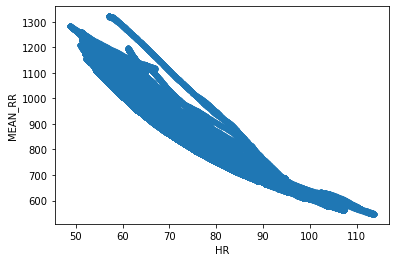

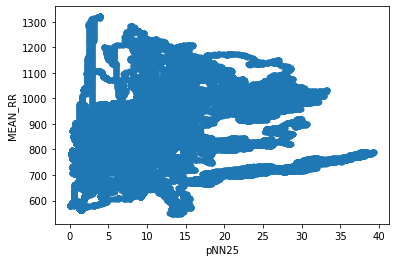

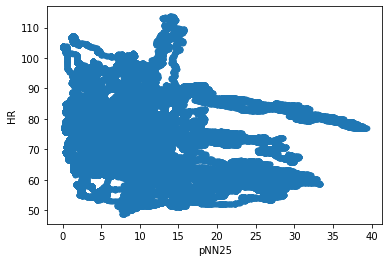

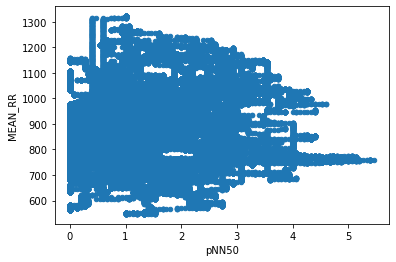

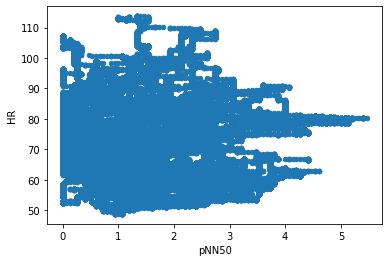

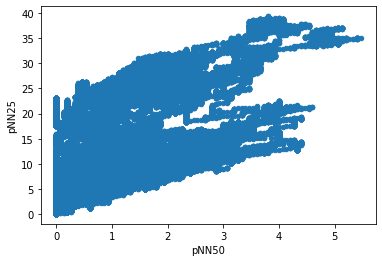

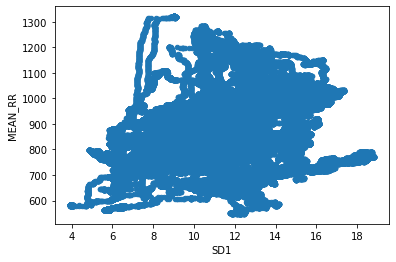

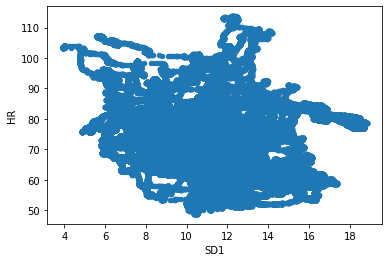

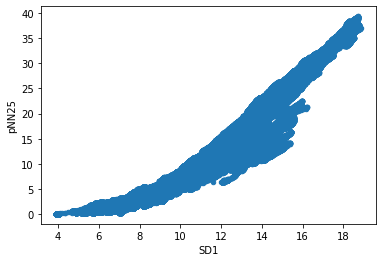

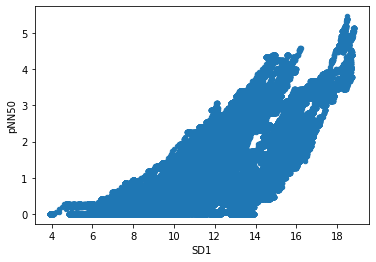

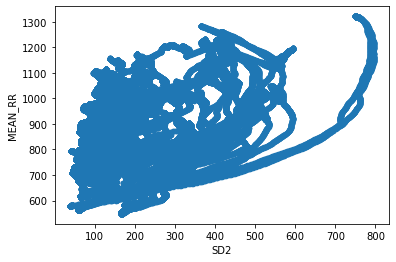

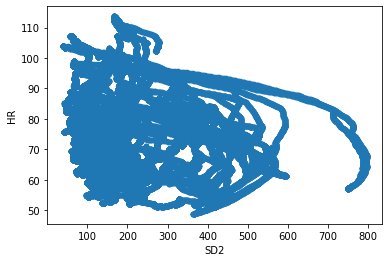

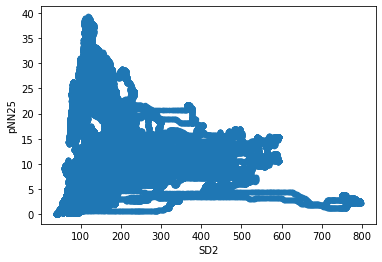

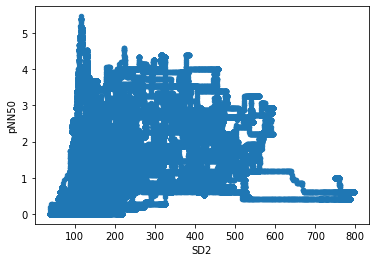

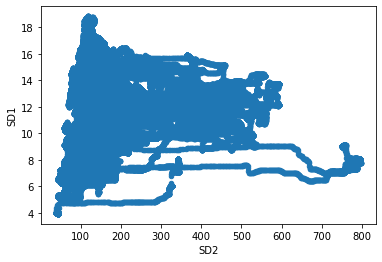

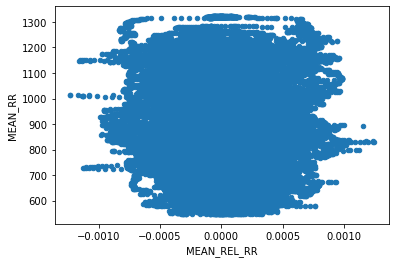

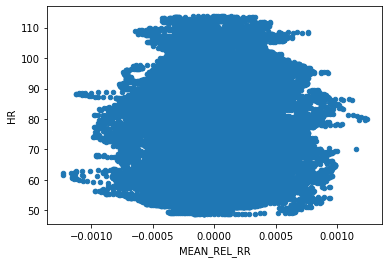

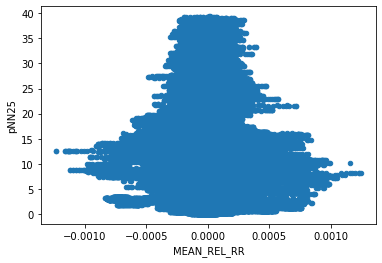

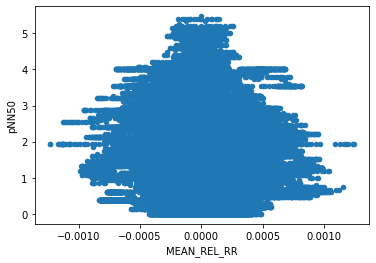

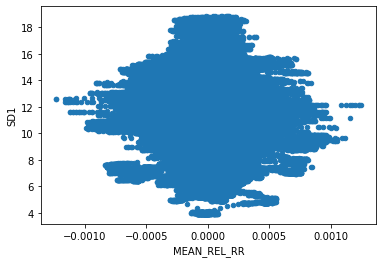

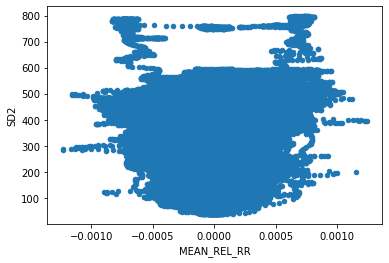

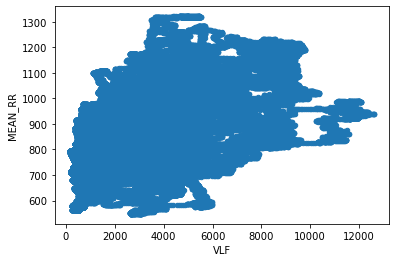

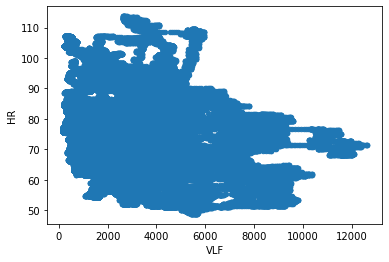

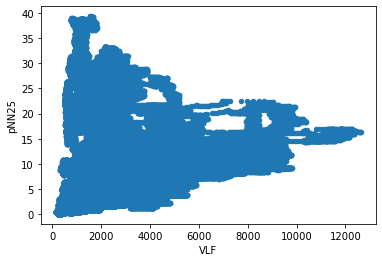

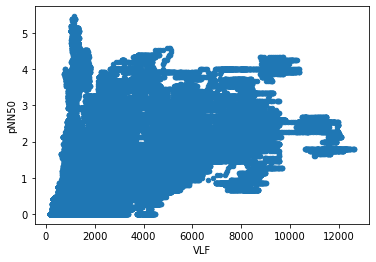

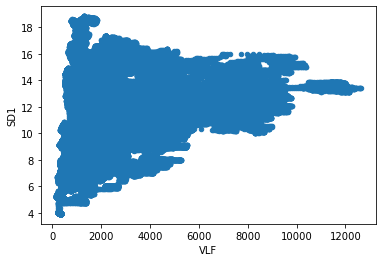

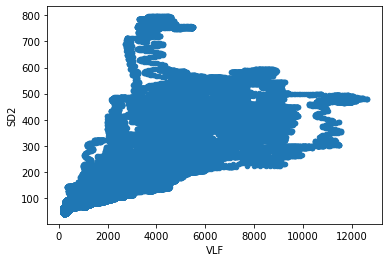

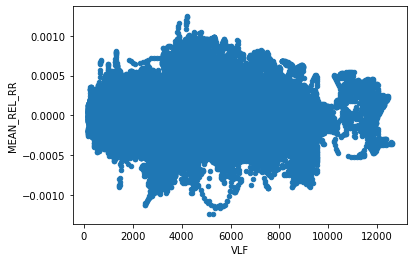

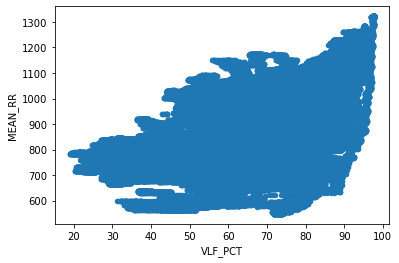

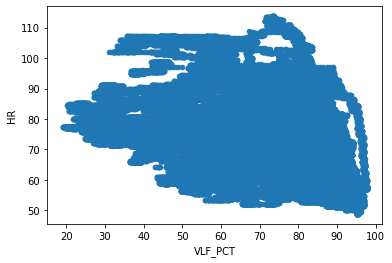

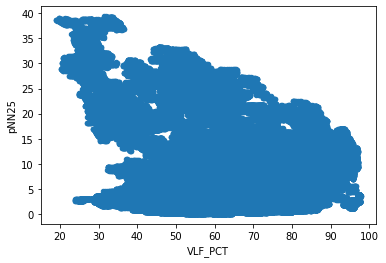

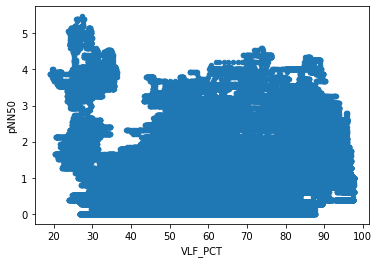

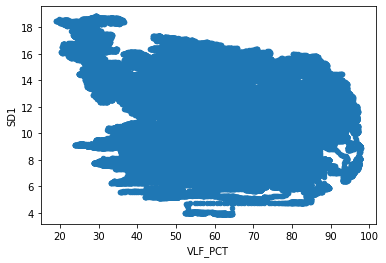

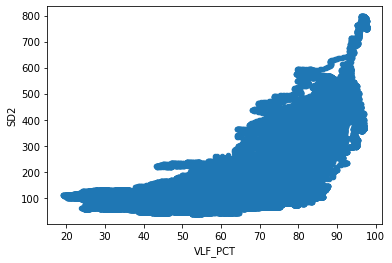

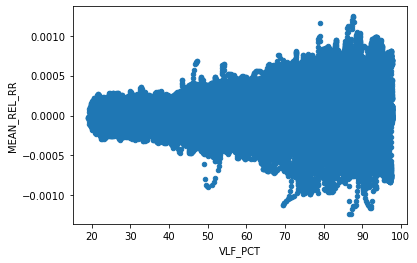

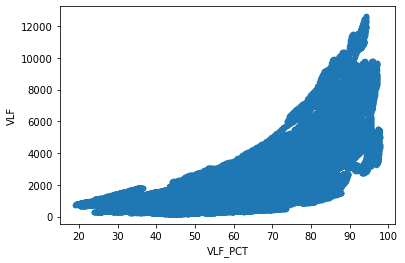

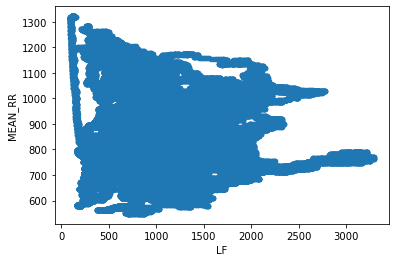

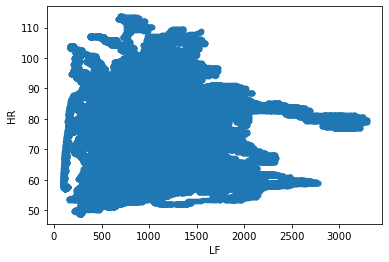

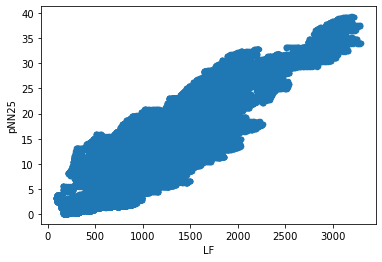

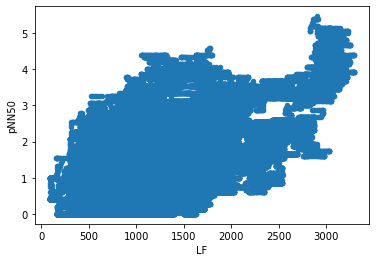

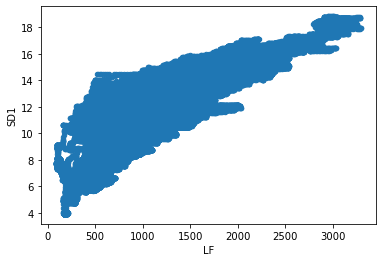

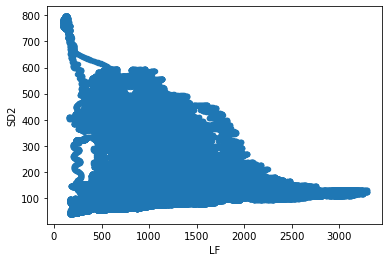

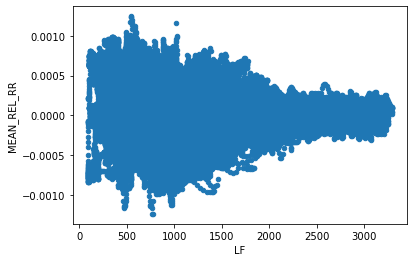

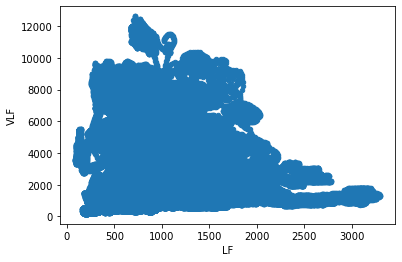

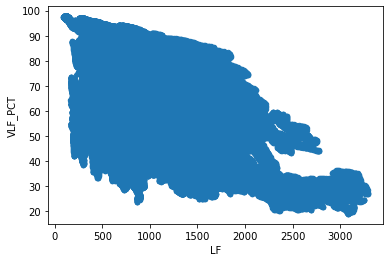

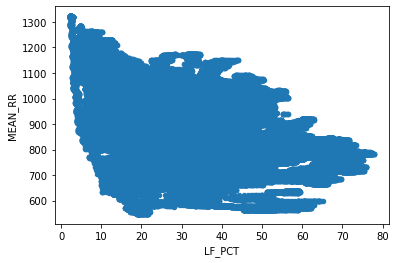

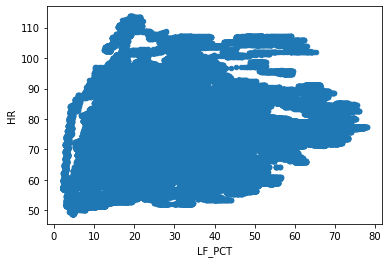

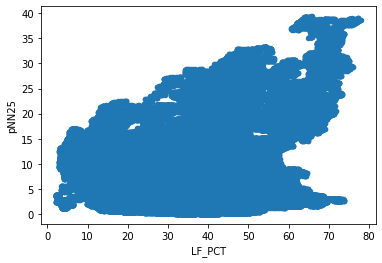

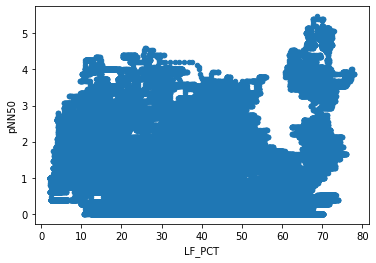

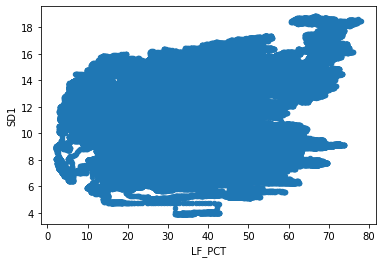

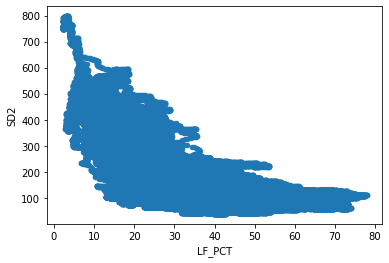

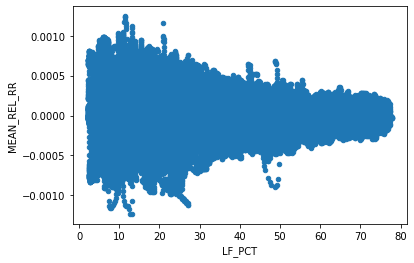

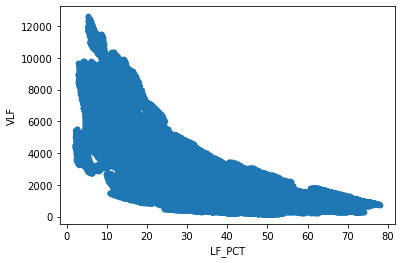

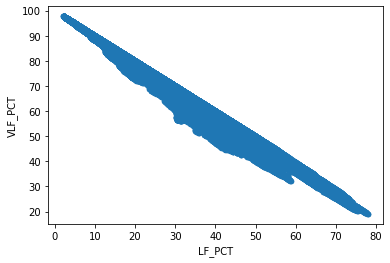

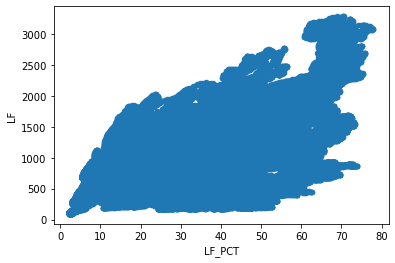

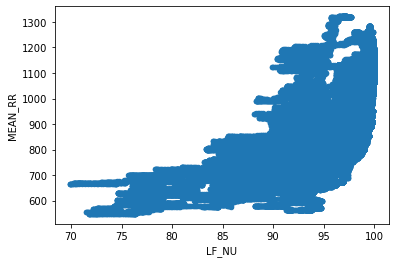

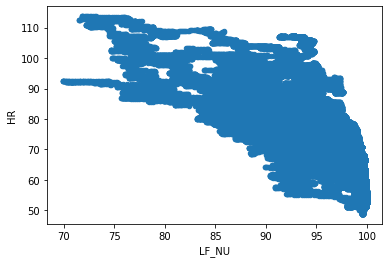

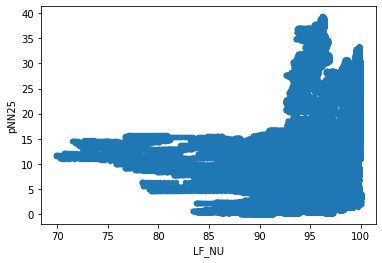

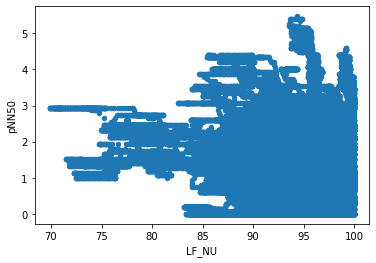

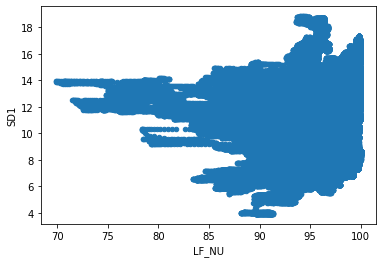

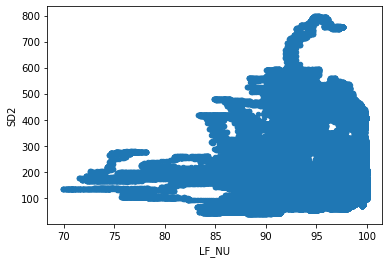

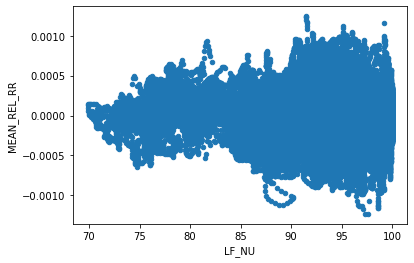

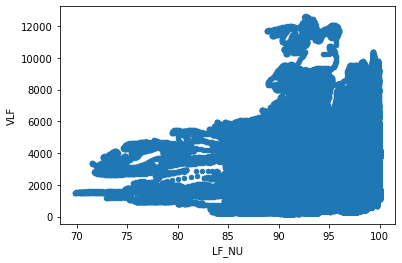

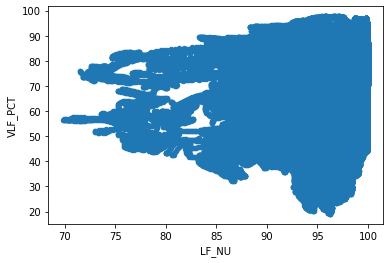

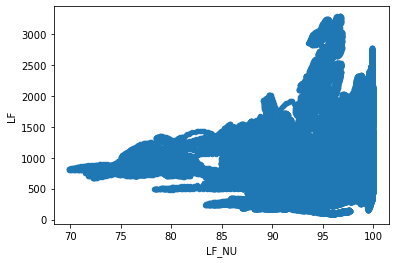

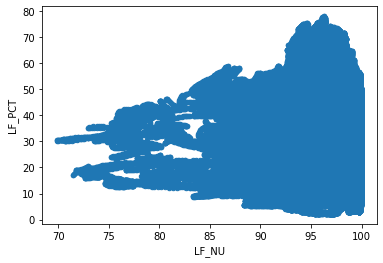

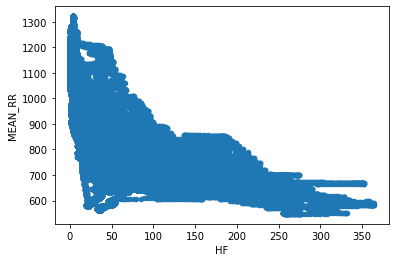

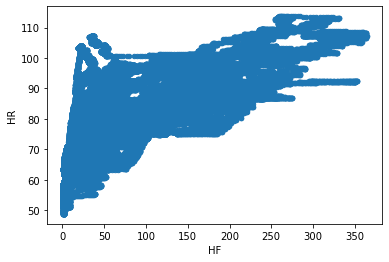

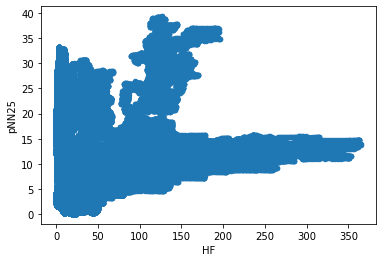

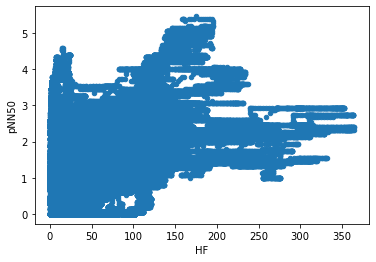

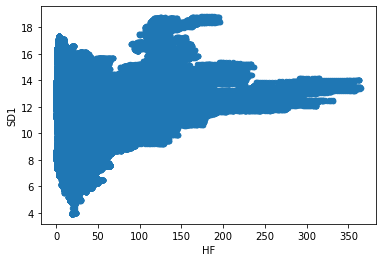

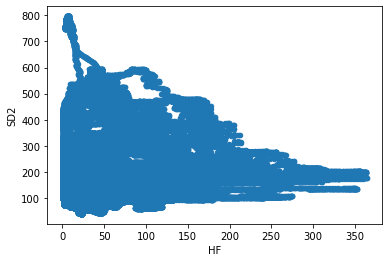

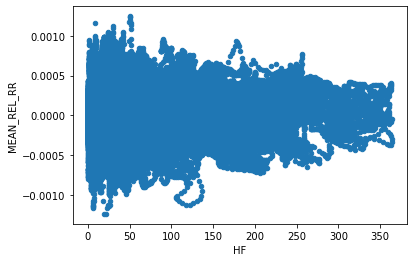

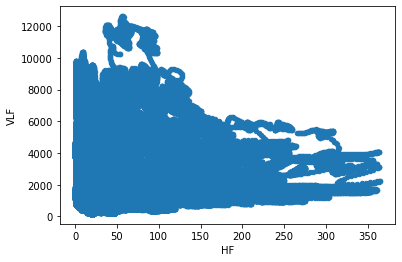

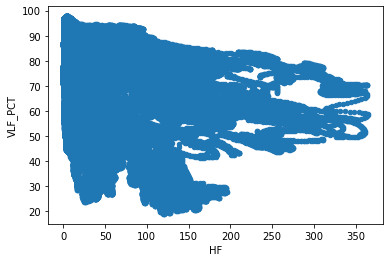

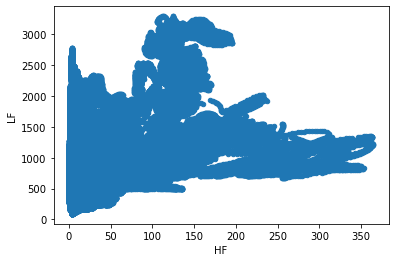

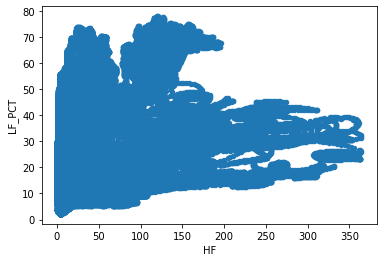

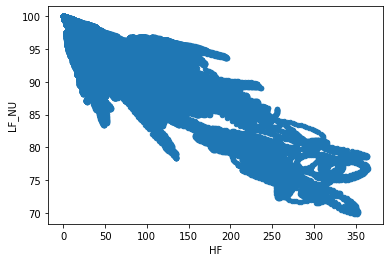

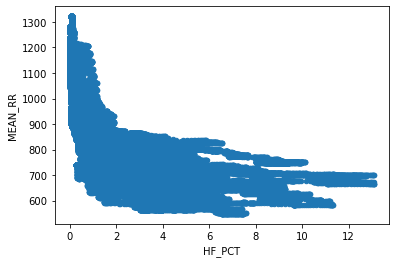

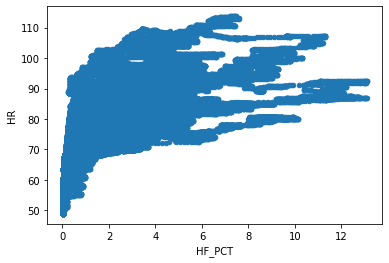

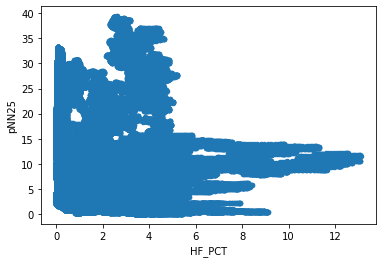

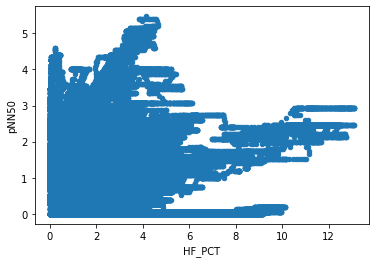

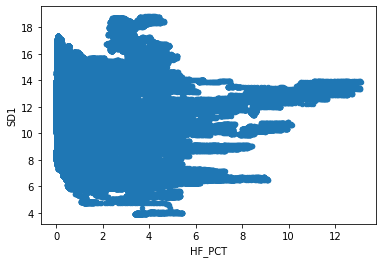

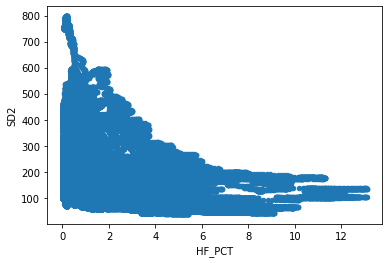

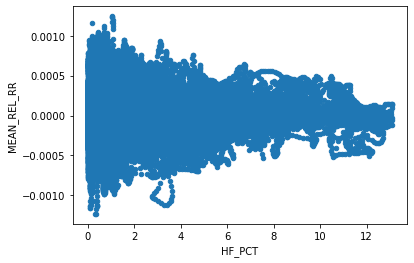

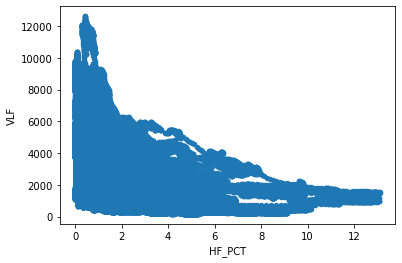

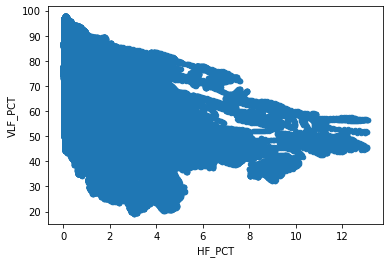

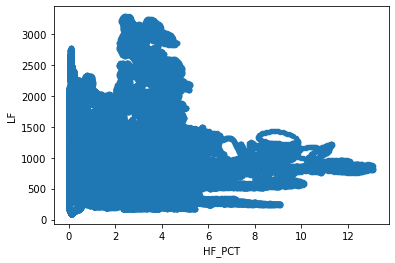

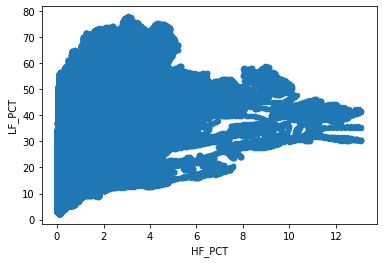

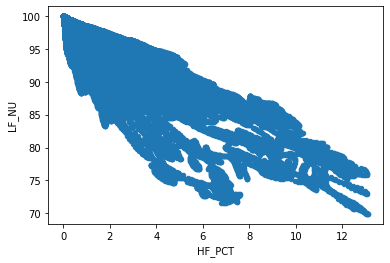

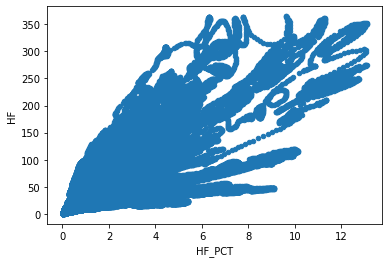

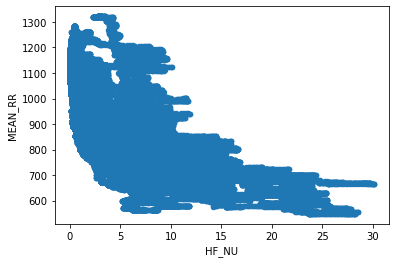

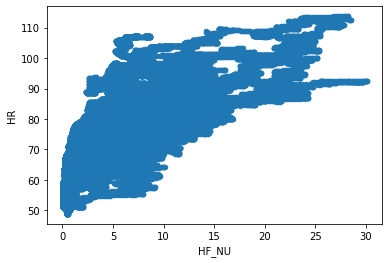

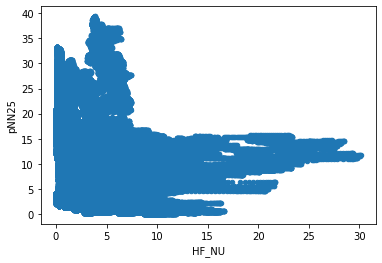

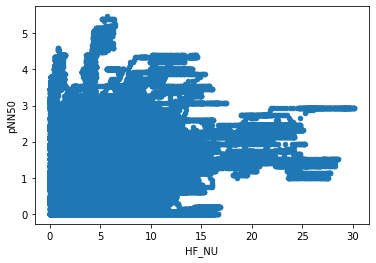

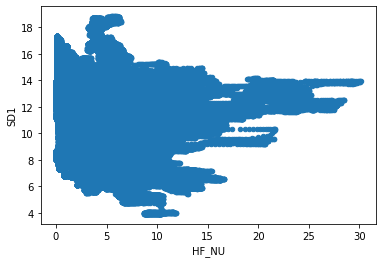

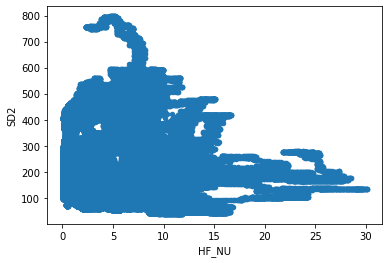

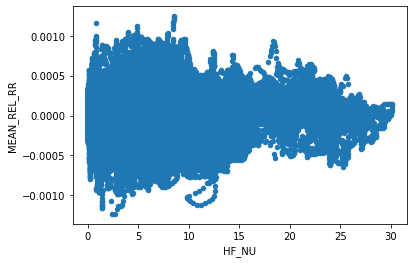

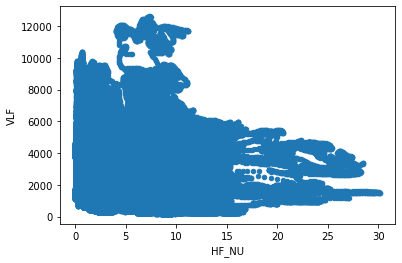

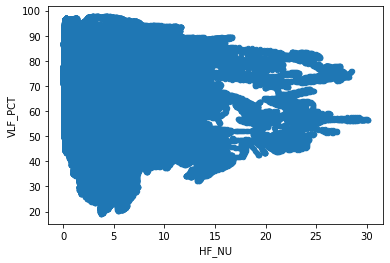

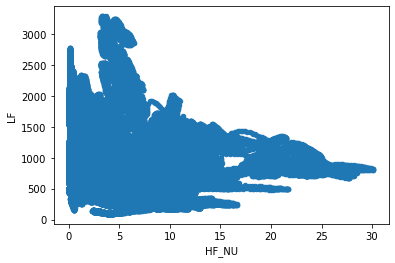

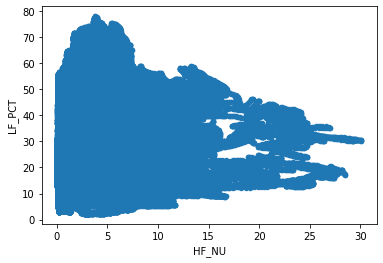

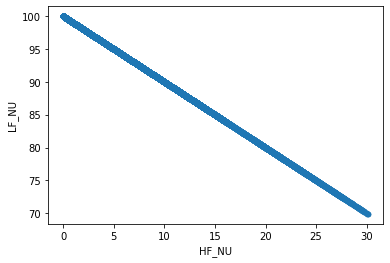

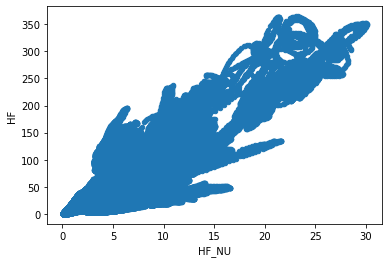

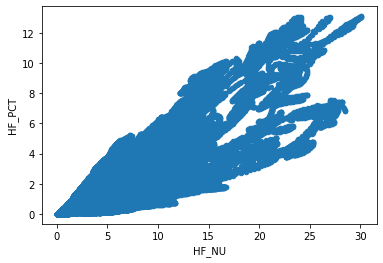

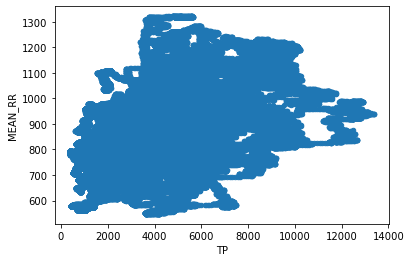

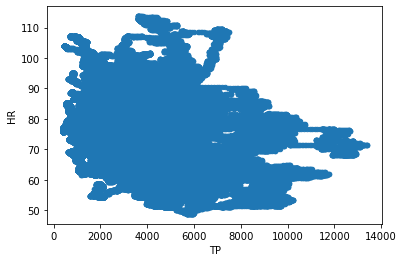

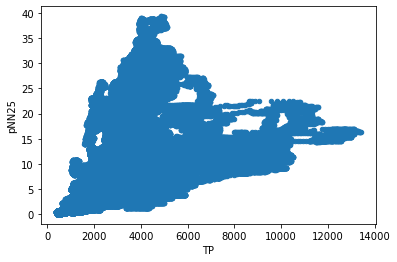

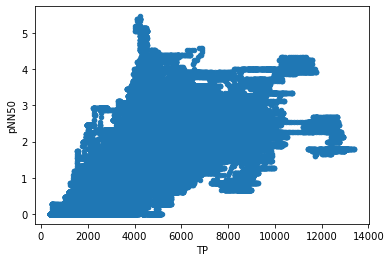

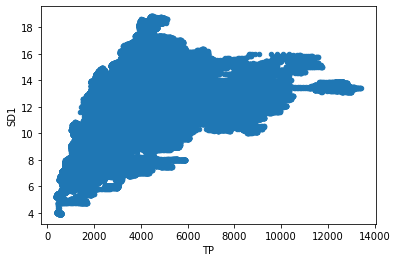

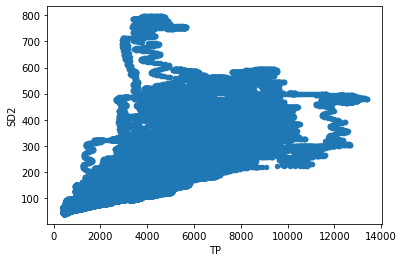

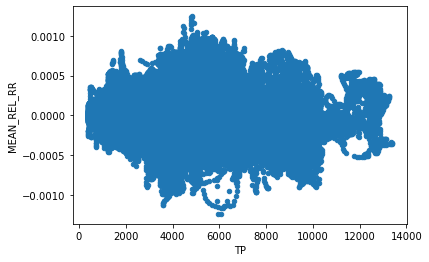

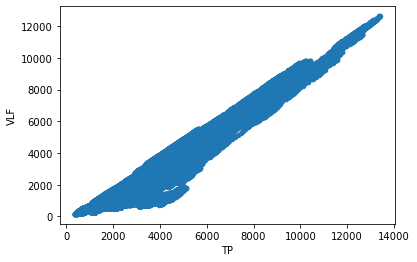

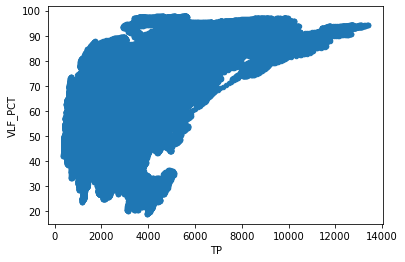

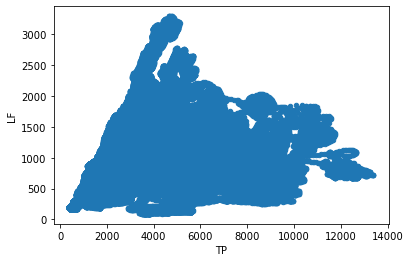

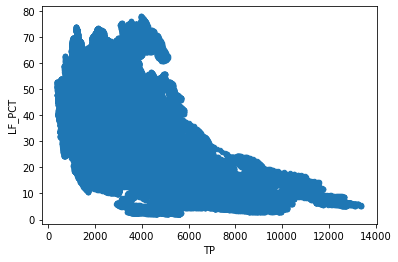

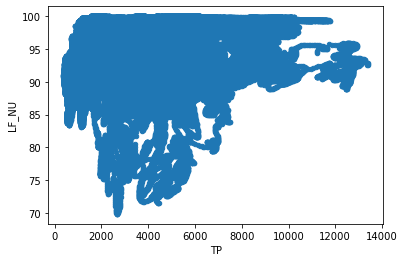

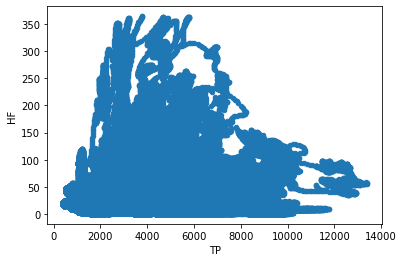

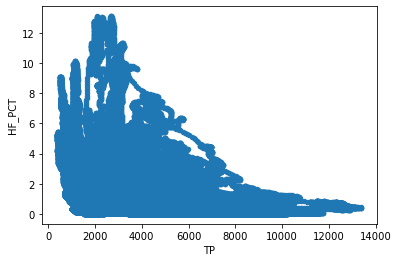

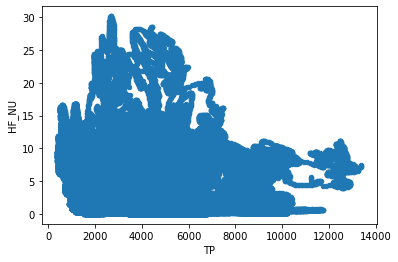

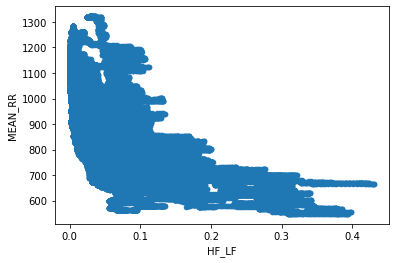

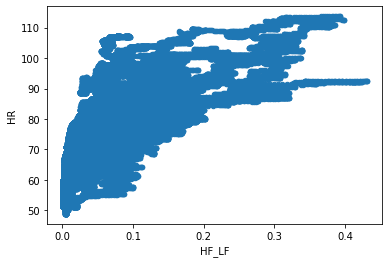

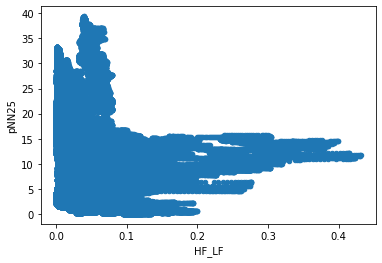

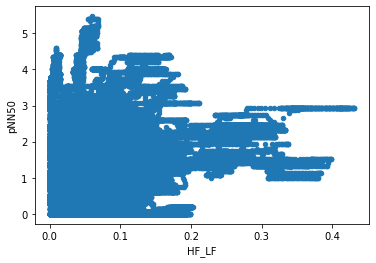

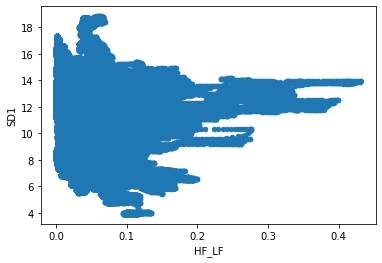

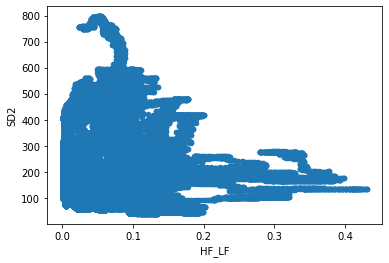

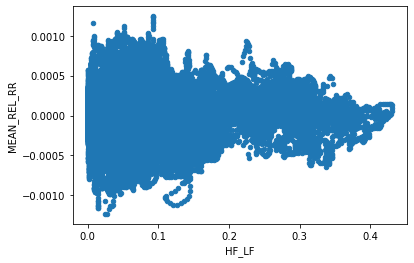

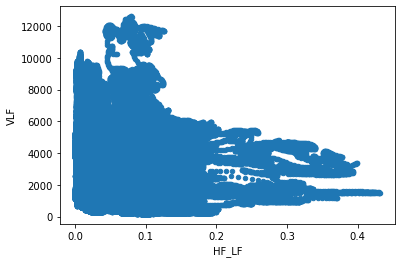

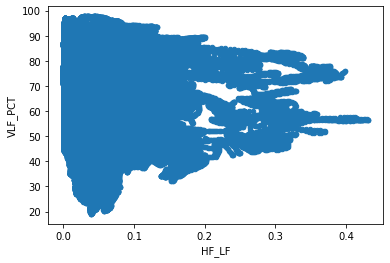

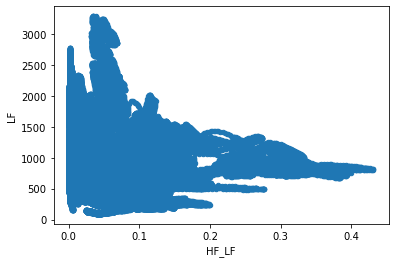

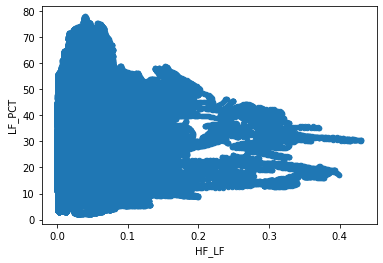

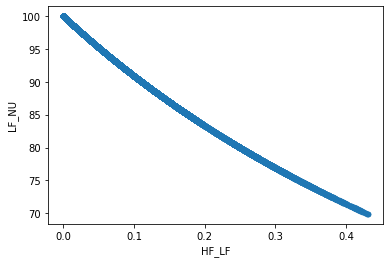

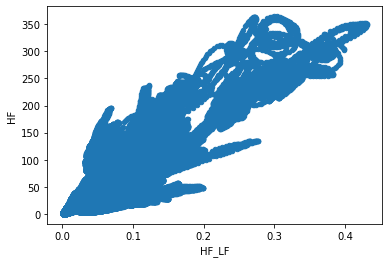

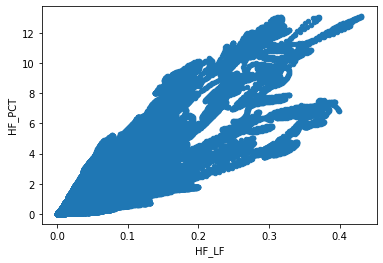

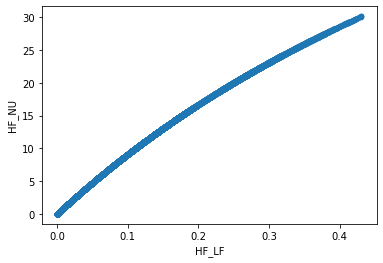

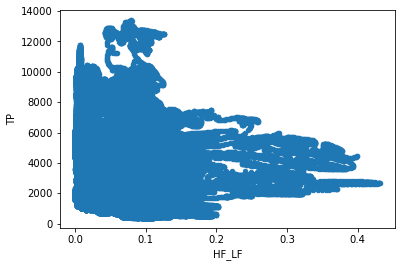

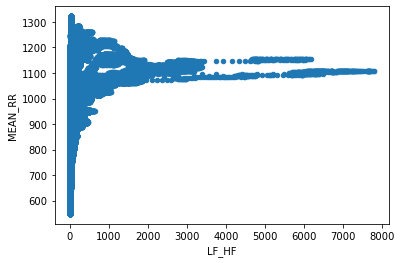

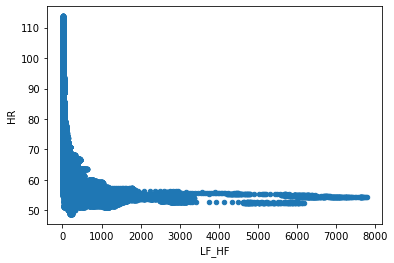

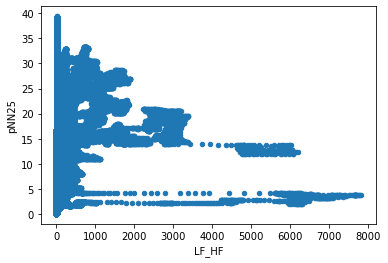

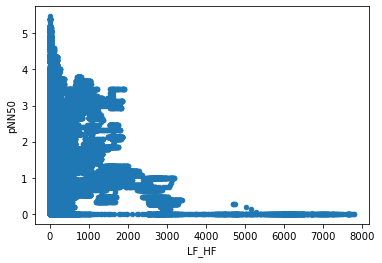

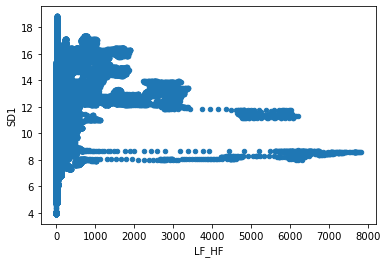

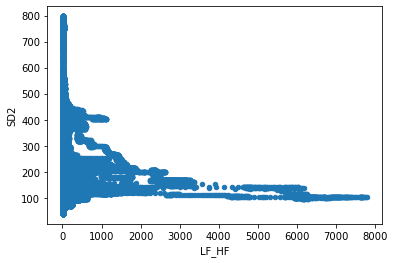

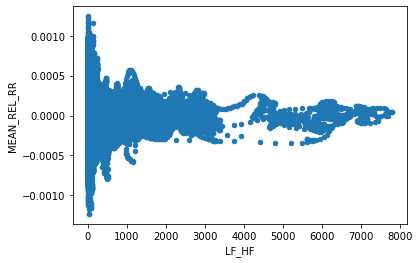

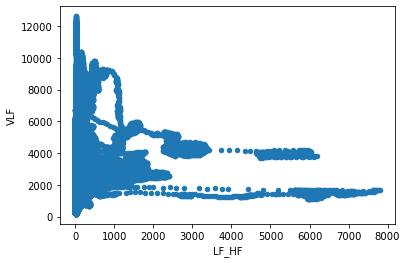

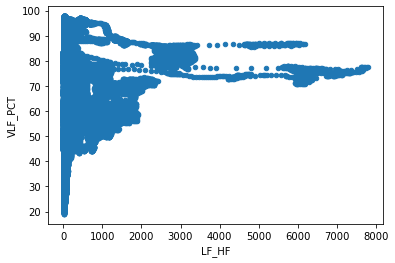

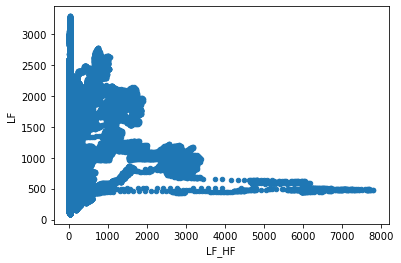

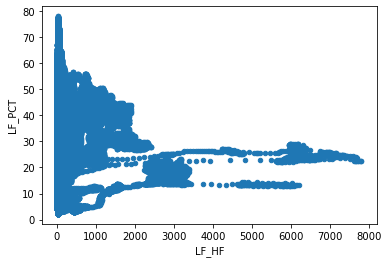

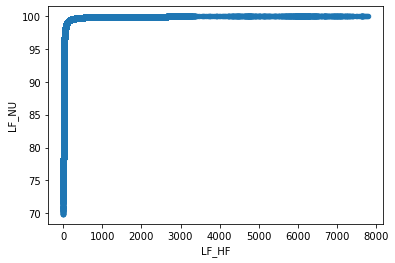

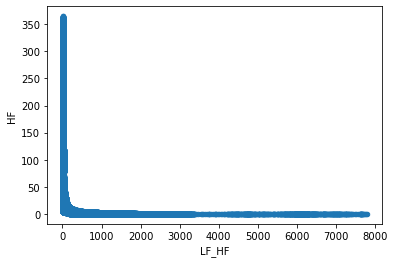

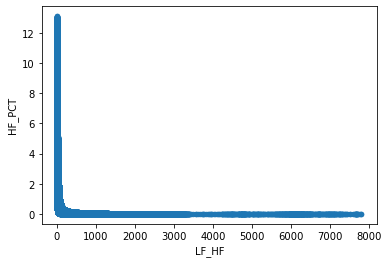

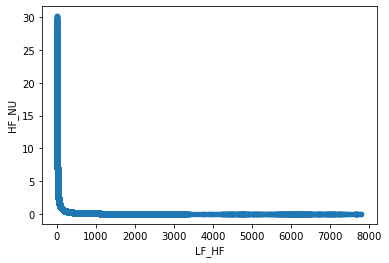

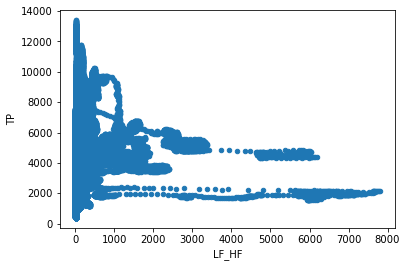

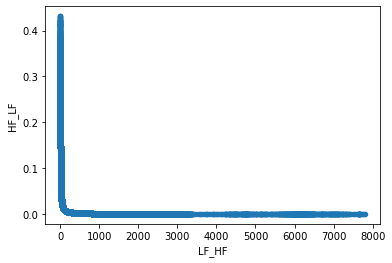

In [5]:
xs=["MEAN_RR","HR","pNN25","pNN50","SD1","SD2","MEAN_REL_RR","VLF","VLF_PCT","LF","LF_PCT","LF_NU","HF","HF_PCT","HF_NU","TP","HF_LF","LF_HF"]
ys=xs
for ex in xs:
    print("---------"+ex+"-----------")
    for ey in ys:
        if(ex==ey):
            break
        df_train.plot.scatter(x=ex,y=ey)

In [6]:
df_train

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,no stress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369284,721.396910,721.533965,36.377559,9.609941,9.609936,3.785409,83.384647,0.933333,0.000000,6.797519,...,38.227175,5.886975,10.880317,649.351702,8.190908,0.122087,2.096850,1.314910,2,no stress
369285,984.266492,978.622945,74.918433,13.762274,13.761705,5.443754,61.314243,6.333333,0.200000,9.734243,...,2.573834,0.112964,0.357547,2278.456746,278.683532,0.003588,2.131264,1.175975,2,no stress
369286,1025.499743,1024.968400,95.309200,23.051254,23.050395,4.134664,59.028594,30.400000,2.066667,16.304530,...,4.287216,0.098983,0.180070,4331.259564,554.340761,0.001804,2.215643,1.140232,2,no stress
369287,798.123167,803.559610,78.449897,16.736686,16.736657,4.687302,75.978628,10.000000,1.466667,11.838553,...,46.636158,1.591647,3.522995,2930.056129,27.384942,0.036516,2.091628,1.181937,2,no stress


In [15]:
import hypertools

hypertools.load()

KeyError: 0